## Monomial form of polynomial interpolation
__CYBR 304__ <br>
_Spring 2024_ <br>

Let's suppose we have a bunch of points in $\mathbf{R}^2$ that have _distinct_ first coordinates. Say the points are
$$
    (x_0, y_0),  (x_1, y_1), (x_2, y_2), \dots, (x_n, y_n).
$$
The subscripts start at zero and end with $n$, so we have $n+1$ points in $\mathbf{R}^2$.

We call the first coordinates of each point, that is $x_0, x_1, \dots, x_n$ the _knots._ Since the first coordinates are distinct, the points $(x_0, y_0)$ through $(x_n, y_n)$ are points on the graph of some function. The function _isn't_ unique, but let's try to find a function in the simplest class we can think of has these points on its graph. 

The simplest largish set of functions are the polynomials, so say we want to determine a polynomial $P$ that satisfies
$$
   P(x_0) = y_0, P(x_1) = y_1, \dots, P(x_n) = y_n.
$$
This is a very famous _interpolation problem._  And the points $(x_0, y_0),  (x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$ are the _interpolation points._


Say our polynomial is
$$
   P(x) = c_0  + c_1 x + c_2 x^2 + \cdots c_m x^m.
$$
where the coefficients $c_0$ through $c_m$ are to be determined. We have $n+1$ equations and $m+1$ coefficients, so we might _guess_ that we need $m = n.$ The condition $ P(x_0) = y_0$ gives
$$
   c_0 + c_1 x_0 + c_2 x_0^2 + c_3 x_0^3 + \cdots c_n x_0^n = y_0.
$$
Although this might look like a mess, it's really a linear equation for the unknowns $c_0$ through $c_n$. Using the remaining equations, that is,  $P(x_1) = y_1, \dots, P(x_n) = y_n$ and arranging the equations in matrix form gives
$$
  \begin{bmatrix} 1 & x_0 & x_0^2 & \cdots & x_0^n \\
                 1 & x_1 & x_1^2 & \cdots & x_1^n  \\
                 \vdots & \vdots & \vdots & \vdots \\
                  1 & x_n & x_n^2 & \cdots & x_n^n
   \end{bmatrix}  
   \begin{bmatrix}
       c_0 \\
       c_1 \\
       \vdots \\
       c_n
    \end{bmatrix} =  
     \begin{bmatrix}
       y_0 \\
       y_1 \\
       \vdots \\
       y_n
    \end{bmatrix}
$$
Starting with a power of zero, each row of the coefficient matrix is an ascending list of powers of a knot. Any such matrix is a _Vandermonde_ matrix (https://en.wikipedia.org/wiki/Vandermonde_matrix). Unless the _Vandemonde_ matrix is singular (doesn't have an inverse), we've solved our problem. We'll soon prove that if the knots are distinct, a Vandermonde matrix has an inverse.


Let's look at an example.

In [2]:
using LinearAlgebra

Let's build a function that constructs a Vandermonde matrix from a collection of the knots. The collection could be either a Julia tuple or a Julia array. Our function is

In [3]:
function vandermonde(x)
    n = length(x)
    [x[i]^j for i = 1: n,j = 0 : n-1]
end

vandermonde (generic function with 1 method)

In [4]:
M = vandermonde((0,1,2,3,4))

5×5 Matrix{Int64}:
 1  0   0   0    0
 1  1   1   1    1
 1  2   4   8   16
 1  3   9  27   81
 1  4  16  64  256

To solve the interpolation problem, we only need to solve a linear system.

In [5]:
b = [1; 4; -3; 107; -46]

5-element Vector{Int64}:
   1
   4
  -3
 107
 -46

In [6]:
c = M \ b


5-element Vector{Float64}:
    1.0
  177.08333333333348
 -300.875
  147.91666666666666
  -21.125

Is this correct? Should we check? Of course, we should check. We would like to build a function that evaluates the polynomial $ x \mapsto c_0 + c_1 x + c_2 x^2 + \cdots c_n x^n$.

Maybe we should use our polynomial evaluation code, but let's use a more Julia way:

In [7]:
P = x -> @evalpoly(x, c...)

#3 (generic function with 1 method)

The `(x, c...)` is a tricky Julia way to effectively do `(x, c_0, c_1, \dots, c_n)`.

Mapping $P$ onto $(0,1,2,3,4)$ should give $(1,4,-3,107, -46)$. It does

In [8]:
map(P, (0,1,2,3,4))

(1.0, 4.000000000000142, -2.9999999999997726, 107.0000000000002, -46.0)

Actually, _every_ time we solve a linear system, we should check the condition number:

In [9]:
cond(M, Inf)

4546.666666666666

Compared to the machine epsilon, this isn't huge. Let's try G from GNAT. Looks like we are drinking from the fountain of success!

In [10]:
using Gadfly

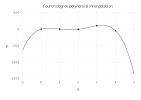

In [11]:
plot(layer(x = [0,1,2,3,4],y=[1,4,-3,107, -46],color=[colorant"black"]),
     layer(P, -1,5),color=[colorant"purple"], Guide.title("Fourth degree polynomial interpolation"))

Let's try another. This time, let's have lots of equally spaced knots that are _close_ together.

In [12]:
knots = [1.0 + k/100 for k = 0 : 10]

11-element Vector{Float64}:
 1.0
 1.01
 1.02
 1.03
 1.04
 1.05
 1.06
 1.07
 1.08
 1.09
 1.1

In [13]:
M = vandermonde(knots)

11×11 Matrix{Float64}:
 1.0  1.0   1.0     1.0      1.0      …  1.0      1.0      1.0      1.0
 1.0  1.01  1.0201  1.0303   1.0406      1.07214  1.08286  1.09369  1.10462
 1.0  1.02  1.0404  1.06121  1.08243     1.14869  1.17166  1.19509  1.21899
 1.0  1.03  1.0609  1.09273  1.12551     1.22987  1.26677  1.30477  1.34392
 1.0  1.04  1.0816  1.12486  1.16986     1.31593  1.36857  1.42331  1.48024
 1.0  1.05  1.1025  1.15763  1.21551  …  1.4071   1.47746  1.55133  1.62889
 1.0  1.06  1.1236  1.19102  1.26248     1.50363  1.59385  1.68948  1.79085
 1.0  1.07  1.1449  1.22504  1.3108      1.60578  1.71819  1.83846  1.96715
 1.0  1.08  1.1664  1.25971  1.36049     1.71382  1.85093  1.999    2.15892
 1.0  1.09  1.1881  1.29503  1.41158     1.82804  1.99256  2.17189  2.36736
 1.0  1.1   1.21    1.331    1.4641   …  1.94872  2.14359  2.35795  2.59374

For the second coordinates of each point, let's use

In [14]:
y = [knots[i]^2 + 1 for i = 1 : 11, j=1:1]

11×1 Matrix{Float64}:
 2.0
 2.0201000000000002
 2.0404
 2.0609
 2.0816
 2.1025
 2.1236
 2.1449
 2.1664000000000003
 2.1881000000000004
 2.21

OK--this is tricky our points are $(x_0, 1+x_0^2), (x_1, 1+ x_1^2), \dots $


So when we solve for the coefficients $c$, we expect $c[1] = 1, c[2] = 0, c[3] = 1$ and all additional values of $c$ to vanish. But that's _not_ what we get--the values differ _greatly_ from these values. 

In [16]:
c = M \ y

11×1 Matrix{Float64}:
  1.030852384366234
 -0.21706841063949636
  1.5995770938088747
 -0.6786984456028677
 -0.28198765474438364
  1.9441251044282417
 -2.8351416048381677
  2.248657203948919
 -1.0559439881462565
  0.2771474109667239
 -0.03151909354782171

What's the story?  The condition number for $M$ is so huge, we shouldn't expect the solution to be accurate.

In [17]:
cond(M,Inf)

7.462438101488604e17

What about the residual? The residual is $M c = y$. It is

In [18]:
M * c - y

11×1 Matrix{Float64}:
  0.0
 -8.881784197001252e-16
  4.440892098500626e-16
  8.881784197001252e-16
  0.0
  0.0
 -4.440892098500626e-16
  0.0
 -4.440892098500626e-16
  8.881784197001252e-16
 -4.440892098500626e-16

The members of the residual are all comparable to the machine epsilon. So you might _think_ the solution is accurate, but the solution isn't accurate. Since the residual is small, graphically the solution very nearly goes through the interpolation points.

<div class="alert alert-block alert-warning"><b>Warning:</b> A small residual does not imply an accurate solution.</div>

In [19]:
PP = x -> @evalpoly(x, c...)

#9 (generic function with 1 method)

In [20]:
map(PP, knots) - y

11×1 Matrix{Float64}:
  0.0
 -4.440892098500626e-16
  1.3322676295501878e-15
  4.440892098500626e-16
  4.440892098500626e-16
  0.0
 -4.440892098500626e-16
  0.0
 -8.881784197001252e-16
  1.3322676295501878e-15
  0.0

In [21]:
QQ = x -> x^2 + 1

#11 (generic function with 1 method)

In [22]:
map(QQ, knots) - y

11×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Let's look at the graphs of both $PP$ and $QQ$. At least on the interval $[1,1.1]$, the functions $PP$ and $QQ$ are nearly identical.

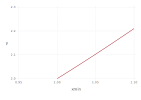

In [23]:
plot(layer(PP, 1,1.1,color=[colorant"purple"]), layer(QQ,1,1.1),color=[colorant"orange"])

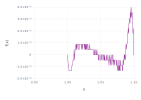

In [24]:
plot(x -> PP(x)-QQ(x),1,1.1,color=[colorant"purple"])

Outside the interval $[1,1.1]$, the functions are different.

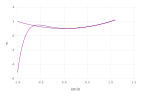

In [25]:
plot(layer(PP, -1,1.1), layer(QQ,-1,1.1),color=[colorant"purple"])

It's a bit mysterious, but although the condition number is huge and we expect the solutions to be inaccurate, we get a interpolating polynomial that is visually accurate.

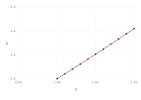

In [26]:
plot(layer(x = knots, y = y,color=[colorant"black"]),
     layer(PP,1, 1.1,color=[colorant"purple"]),
     layer(QQ,1, 1.1,color=[colorant"orange"]))

Both functions $PP$ and $QQ$ do a good job interpolating. But outside the range of the dots, the functions are far apart.

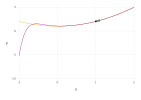

In [27]:
plot(layer(x = knots, y = y,color=[colorant"black"]),
     layer(PP,-1, 2,color=[colorant"purple"]),
     layer(QQ,-1, 2,color=[colorant"orange"]))

Let's put all this together and build a function that returns a function that interpolates given points in the $\mathbf{R}^2$. 

Do we like to be careful? Of course we do, so let's also return the matrix condition number as well as the interpolating polynomial. 

In [28]:
function interpolating_poly(pts::Array)
    M = vandermonde( map(q -> q[1],pts))
    c = M \ map(q -> q[2],pts)
    q -> @evalpoly(q, c...), cond(M,Inf)
end    

interpolating_poly (generic function with 1 method)

A simple test:

In [31]:
fn = interpolating_poly([[2,3],[5,6]])

(var"#17#20"{Vector{Float64}}([1.0, 1.0]), 13.999999999999998)

In [32]:
fn = first(fn)

#17 (generic function with 1 method)

In [33]:
fn(2)

3.0

In [34]:
fn(5)

6.0